In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
df = pd.read_csv("/content/sample_data/creditcard.csv")

#Show or display first five records of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#check number of rows and column of the dataset
a = df.shape
print("Total number of rows and column in the dataset: ",a)

#check whether null values are present or not in the column
b = df.isnull().sum()
print("Null values of each column of the dataset: ",b)

#check datatype of each column
c = df.info()
print("Datatype of each column of the dataset: ",c)

Total number of rows and column in the dataset:  (284807, 31)
Null values of each column of the dataset:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      28480

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Number of classes in Class:  0    284315
1       492
Name: Class, dtype: int64


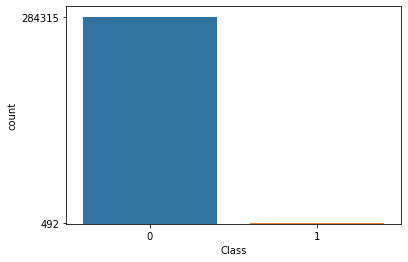

In [ ]:
#check how many classes are there in Class which is to be predicted 
#Also this will tell whether the data is balanced or unbalanced
h = df["Class"].value_counts()
print("Number of classes in Class: ",h)

#visualize how many classes in Income which is to be predicted
sns.countplot(data=df,x="Class")
c = df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
#Seperate input and output variables
X = df.drop("Class",axis=1)
Y = df["Class"]

#Display input and output variables
h = X.columns
print("Display input variables: ",h)
i = Y
print("Display outout variables: ",i)

Display input variables:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Display outout variables:  0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [ ]:
#Train the dataset in 70-30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

#For balancing the given dataset we have to apply sampling technique: Random Over Sampler
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()

#training data (output)
k = pd.Series(Y_train).value_counts() #Here check the data of Yes and No class
print ("Before Data Balancing: ",k)
#apply fit_sample for increasing the minority class data to match with the majority class data
X_sample_train,Y_sample_train = ROS.fit_sample(X_train,Y_train)

#Here again check the data of Yes and No class after applying Random over sampler technique i.e. data balancing
l = pd.Series(Y_sample_train).value_counts() 
print ("After Data Balancing: ",l)


Before Data Balancing:  0    199007
1       357
Name: Class, dtype: int64
After Data Balancing:  1    199007
0    199007
dtype: int64


In [ ]:
#testing data
m = pd.Series(Y_test).value_counts() 
print("Before Data Balancing: ",m)
#Here check the data of Yes and No class

#apply fit_sample for increasing the minority class data to match with the majority class data
X_sample_test,Y_sample_test = ROS.fit_sample(X_test,Y_test)

#Here again check the data of Yes and No class after applying Random over sampler technique i.e. data balancing
n = pd.Series(Y_sample_test).value_counts() 
print("After Data Balancing: ",n)


Before Data Balancing:  0    85308
1      135
Name: Class, dtype: int64
After Data Balancing:  1    85308
0    85308
dtype: int64


In [ ]:
#Here train, test and report generation function is created which will be used everytime whenever we use any classification algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)
    y_pred1 = model.predict(X_sample_test)
    print(classification_report(Y_sample_test,y_pred1))
    print(confusion_matrix(Y_sample_test,y_pred1))
    return model

In [ ]:
#Apply classification algorithm
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
create_model1(lr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     85308
           1       0.97      0.87      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[82816  2492]
 [11217 74091]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#2. Apply DecisionTreeClassifier: GINI Index
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
create_model1(dt1)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     85308
           1       1.00      0.66      0.80     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.83    170616
weighted avg       0.87      0.83      0.83    170616

[[85277    31]
 [28884 56424]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#3. Apply DecisionTreeClassifier: Entropy
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy')
create_model1(dt1)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     85308
           1       1.00      0.72      0.84     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.86    170616
weighted avg       0.89      0.86      0.86    170616

[[85260    48]
 [23883 61425]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#4. Apply DecisionTreeClassifier: Entropy and pruning technique max_depth
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
create_model1(dt2)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[82844  2464]
 [12657 72651]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#5. Apply DecisionTreeClassifier: GINI Index and pruning technique max_depth
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(max_depth=3)
create_model1(dt3)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[83524  1784]
 [12542 72766]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#6. Apply DecisionTreeClassifier: GINI Index and pruning technique min_samples_leaf
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(min_samples_leaf=47)
create_model1(dt3)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85112   196]
 [16305 69003]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=47, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#7. Apply DecisionTreeClassifier: Entropy and pruning technique min_samples_leaf
from sklearn.tree import DecisionTreeClassifier
dt4 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=47)
create_model1(dt4)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85109   199]
 [17016 68292]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=47, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#8. Support Vector Machine (SVM)
#1. Linear SVM
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1)
print("SVM using LINEAR KERNEL function without error added")
svc = create_model1(svc)
#error added soft margin
#error is added to overcome overfit situation
svc1 = LinearSVC(random_state=1,C=0.5)
print("SVM using LINEAR KERNEL function error added")
svc1 = create_model1(svc1)

SVM using LINEAR KERNEL function without error added
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     85308
           1       0.96      0.79      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.89      0.88      0.88    170616
weighted avg       0.89      0.88      0.88    170616

[[82474  2834]
 [17629 67679]]
SVM using LINEAR KERNEL function error added
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     85308
           1       0.98      0.78      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

[[83984  1324]
 [18911 66397]]


In [ ]:
#2.Polynomial Kernel SVM
from sklearn.svm import SVC
poly_svc = SVC(random_state=1,kernel="poly")
create_model1(poly_svc)

In [ ]:
#2.Radial Kernel SVM
from sklearn.svm import SVC
radial_svc = SVC(random_state=1,kernel="rbf")
create_model1(radial_svc)

In [ ]:
#Apply ensembling technique
#1. Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
create_model1(rf)

In [ ]:
#2. ADA Boost 
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
create_model1(abc)

In [ ]:
#3. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100)
create_model1(gbc)

In [ ]:
#4. Extreme Gradient Boosting
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,reg_alpha=1)
create_model1(xgb)